In [1]:
# 데이터 복제된 여행자 데이터셋 (아직 실험중)


import pandas as pd
df = pd.read_csv('c:/Users/qudgn/Desktop/BH/프로젝트/정규프로젝트/data/TR/TR_전국_전처리/여행자/전국_여행자_조인_파생_복제1.csv')

In [2]:
# 전처리 전 결측값 확인
print(df.isnull().sum())

TRAVELER_ID                  0
REGION_1                  7721
REGION_2                  7728
REGION_3                  7731
REGION_4                  7693
MALE                         0
FEMALE                       0
AGE_GRP                      0
JOB_1                        0
JOB_2                        0
JOB_3                        0
JOB_4                        0
JOB_5                        0
TRAVEL_TERM                  0
TRAVEL_NUM                   0
MOTIVE_1                     0
MOTIVE_2                     0
MOTIVE_3                     0
MOTIVE_4                     0
MOTIVE_5                     0
MOTIVE_6                     0
MOTIVE_7                     0
MOTIVE_8                     0
MOTIVE_9                     0
TRAVEL_COMPANIONS_NUM        0
MARR_STTS                    0
FAMILY_MEMB                  0
INCOME                       0
MVMN_1                     599
MVMN_2                     599
MVMN_3                     599
MVMN_4                     599
MVMN_5  

In [3]:
# NAN값 확인1
print(df[['MALE', 'FEMALE', 'AGE_GRP',
          'REGION_1','REGION_2','REGION_3','REGION_4',
          'JOB_1','JOB_2','JOB_3','JOB_4','JOB_5',
          'TRAVEL_TERM','TRAVEL_NUM','TRAVEL_COMPANIONS_NUM'
          ,'MOTIVE_1','MOTIVE_2','MOTIVE_3','MOTIVE_4','MOTIVE_5','MOTIVE_6','MOTIVE_7','MOTIVE_8','MOTIVE_9']].isna().sum())

MALE                        0
FEMALE                      0
AGE_GRP                     0
REGION_1                 7721
REGION_2                 7728
REGION_3                 7731
REGION_4                 7693
JOB_1                       0
JOB_2                       0
JOB_3                       0
JOB_4                       0
JOB_5                       0
TRAVEL_TERM                 0
TRAVEL_NUM                  0
TRAVEL_COMPANIONS_NUM       0
MOTIVE_1                    0
MOTIVE_2                    0
MOTIVE_3                    0
MOTIVE_4                    0
MOTIVE_5                    0
MOTIVE_6                    0
MOTIVE_7                    0
MOTIVE_8                    0
MOTIVE_9                    0
dtype: int64


In [4]:
# NAN값 확인2
print(df[['ACT_1','ACT_2','ACT_3','ACT_4','MVMN_1','MVMN_2','MVMN_3','MVMN_4','MVMN_5','LODGING_1','LODGING_2','LODGING_3',
          'LODGING_4','LODGING_5','LODGING_6']].isna().sum())

ACT_1           31
ACT_2           31
ACT_3           31
ACT_4        10210
MVMN_1         599
MVMN_2         599
MVMN_3         599
MVMN_4         599
MVMN_5         599
LODGING_1     5275
LODGING_2     5275
LODGING_3     5275
LODGING_4     5275
LODGING_5     5275
LODGING_6     5275
dtype: int64


In [5]:
# 공백 문자 제거 후 0으로 대체1
df[['REGION_1','REGION_2','REGION_3','REGION_4',
    'ACT_1','ACT_2','ACT_3','ACT_4',
    'MVMN_1','MVMN_2','MVMN_3','MVMN_4','MVMN_5',
    'LODGING_1','LODGING_2','LODGING_3','LODGING_4',
    'LODGING_5','LODGING_6']] = df[['REGION_1','REGION_2','REGION_3','REGION_4',
                                    'ACT_1','ACT_2','ACT_3','ACT_4',
                                    'MVMN_1','MVMN_2','MVMN_3','MVMN_4','MVMN_5',
                                    'LODGING_1','LODGING_2','LODGING_3','LODGING_4',
                                    'LODGING_5','LODGING_6']].replace(r'^\s*$', 0, regex=True).fillna(0)

In [6]:
# NAN값 확인 

print(df.isnull().sum())

TRAVELER_ID                 0
REGION_1                    0
REGION_2                    0
REGION_3                    0
REGION_4                    0
MALE                        0
FEMALE                      0
AGE_GRP                     0
JOB_1                       0
JOB_2                       0
JOB_3                       0
JOB_4                       0
JOB_5                       0
TRAVEL_TERM                 0
TRAVEL_NUM                  0
MOTIVE_1                    0
MOTIVE_2                    0
MOTIVE_3                    0
MOTIVE_4                    0
MOTIVE_5                    0
MOTIVE_6                    0
MOTIVE_7                    0
MOTIVE_8                    0
MOTIVE_9                    0
TRAVEL_COMPANIONS_NUM       0
MARR_STTS                   0
FAMILY_MEMB                 0
INCOME                      0
MVMN_1                      0
MVMN_2                      0
MVMN_3                      0
MVMN_4                      0
MVMN_5                      0
LODGING_1 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 종속 변수와 독립 변수 설정
X = df[['MALE', 'FEMALE', 'AGE_GRP',
        'REGION_1','REGION_2','REGION_3','REGION_4',
        'JOB_1','JOB_2','JOB_3','JOB_4','JOB_5',
        'TRAVEL_TERM','TRAVEL_NUM','TRAVEL_COMPANIONS_NUM',
        'MOTIVE_1','MOTIVE_2','MOTIVE_3','MOTIVE_4','MOTIVE_5','MOTIVE_6','MOTIVE_7','MOTIVE_8','MOTIVE_9',
        'ACT_1','ACT_2','ACT_3','ACT_4',
        'MVMN_1','MVMN_2','MVMN_3','MVMN_4','MVMN_5',
        'LODGING_1','LODGING_2','LODGING_3','LODGING_4','LODGING_5','LODGING_6']]

y = df['PAYMENT_GRADE']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 변수별 회귀 계수 출력
coefficients = model.coef_[0]  # 첫 번째 클래스의 계수
features = X.columns  # 피처 이름

# 계수와 피처를 데이터프레임으로 정리
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)

[[1583   54]
 [ 176  246]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1637
           1       0.82      0.58      0.68       422

    accuracy                           0.89      2059
   macro avg       0.86      0.77      0.81      2059
weighted avg       0.88      0.89      0.88      2059

                  Feature  Coefficient
33              LODGING_1     0.890638
31                 MVMN_4     0.835143
35              LODGING_3     0.817515
14  TRAVEL_COMPANIONS_NUM     0.703500
28                 MVMN_1     0.406025
38              LODGING_6     0.362458
37              LODGING_5     0.328888
36              LODGING_4     0.321359
34              LODGING_2     0.293961
29                 MVMN_2     0.285156
30                 MVMN_3     0.176792
25                  ACT_2     0.110387
23               MOTIVE_9     0.108424
13             TRAVEL_NUM     0.087344
26                  ACT_3     0.058137
6                REGIO

[[1461  176]
 [ 172  250]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1637
           1       0.59      0.59      0.59       422

    accuracy                           0.83      2059
   macro avg       0.74      0.74      0.74      2059
weighted avg       0.83      0.83      0.83      2059



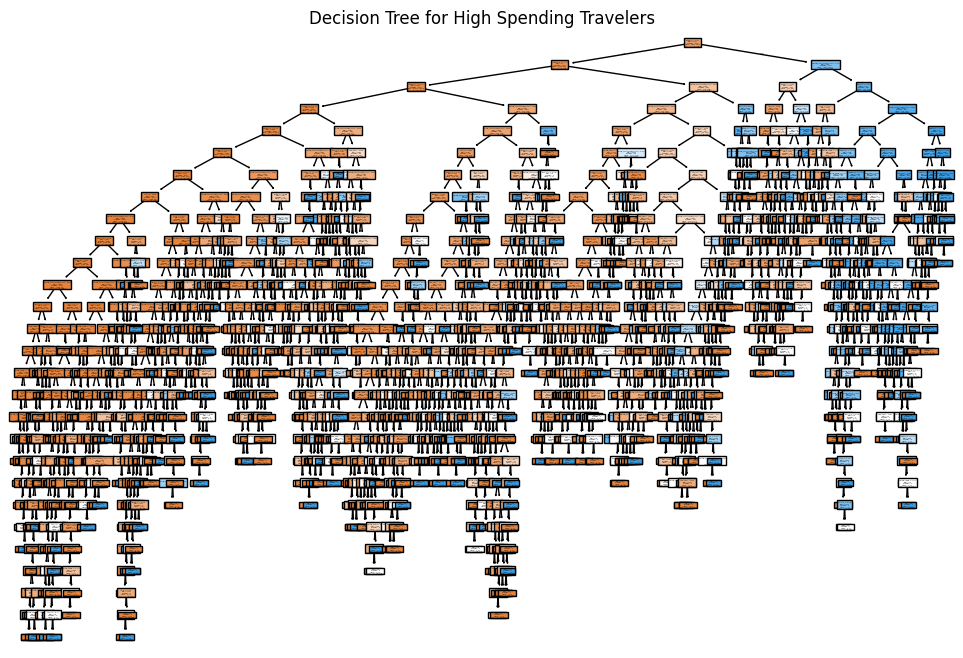

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 결정 트리 모델 생성 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not High Spend', 'High Spend'], filled=True)
plt.title("Decision Tree for High Spending Travelers")
plt.show()

[[1579   58]
 [ 194  228]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1637
           1       0.80      0.54      0.64       422

    accuracy                           0.88      2059
   macro avg       0.84      0.75      0.79      2059
weighted avg       0.87      0.88      0.87      2059



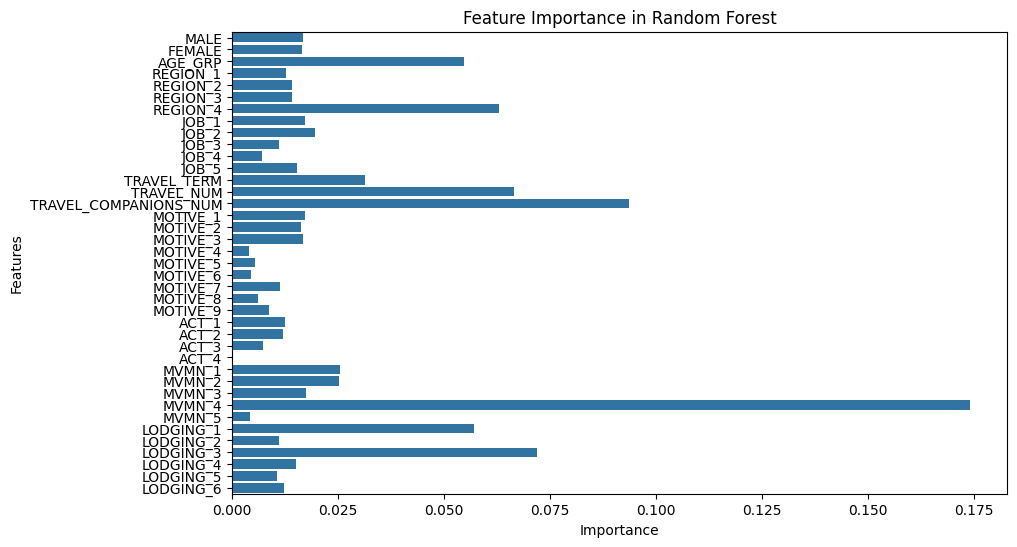

                  Feature  Importance
31                 MVMN_4    0.174025
14  TRAVEL_COMPANIONS_NUM    0.093629
35              LODGING_3    0.071838
13             TRAVEL_NUM    0.066534
6                REGION_4    0.063044
33              LODGING_1    0.057102
2                 AGE_GRP    0.054681
12            TRAVEL_TERM    0.031464
28                 MVMN_1    0.025392
29                 MVMN_2    0.025242
8                   JOB_2    0.019512
30                 MVMN_3    0.017346
15               MOTIVE_1    0.017300
7                   JOB_1    0.017101
0                    MALE    0.016782
17               MOTIVE_3    0.016618
1                  FEMALE    0.016608
16               MOTIVE_2    0.016166
11                  JOB_5    0.015423
36              LODGING_4    0.015174
5                REGION_3    0.014225
4                REGION_2    0.014164
3                REGION_1    0.012646
24                  ACT_1    0.012453
38              LODGING_6    0.012149
25          

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 피처 중요도 시각화
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# 피처 중요도 출력
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [11]:
# SVM
# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# SVM 결정 경계 시각화 (2D)
# 아래 코드는 X의 두 개의 특성만 사용하는 경우에 해당합니다.
# 주의: 2D 시각화를 위해 필요한 경우 두 개의 특성만 선택하세요.
if X.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=50)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

[[1579   58]
 [ 194  228]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1637
           1       0.80      0.54      0.64       422

    accuracy                           0.88      2059
   macro avg       0.84      0.75      0.79      2059
weighted avg       0.87      0.88      0.87      2059



Epoch 1/50


c:\python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8078 - loss: 0.4354 - val_accuracy: 0.8780 - val_loss: 0.3140
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8877 - loss: 0.2767 - val_accuracy: 0.8749 - val_loss: 0.3162
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9019 - loss: 0.2471 - val_accuracy: 0.8713 - val_loss: 0.3132
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9041 - loss: 0.2372 - val_accuracy: 0.8749 - val_loss: 0.3059
Epoch 5/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9014 - loss: 0.2354 - val_accuracy: 0.8780 - val_loss: 0.3114
Epoch 6/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9071 - loss: 0.2313 - val_accuracy: 0.8774 - val_loss: 0.3181
Epoch 7/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9061 - loss: 0.2297 - val_accuracy: 0.8755 - val_loss: 0.3264
Epoch 8/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9116 - loss: 0.2156 - val_accuracy:

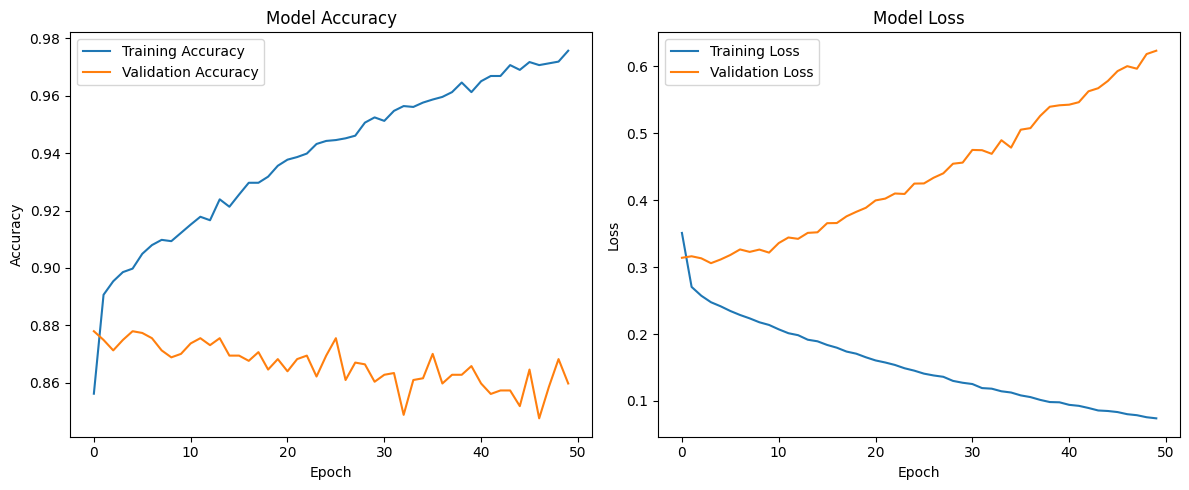

In [12]:
# 신경망
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리: 결측치 처리 및 feature 선택
# df.fillna(0, inplace=True)  # 결측치를 0으로 대체


# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 예측
y_pred_prob = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # 확률을 이진 클래스로 변환

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 훈련 과정 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

F1 Score: 0.6125
ROC AUC Score: 0.8531


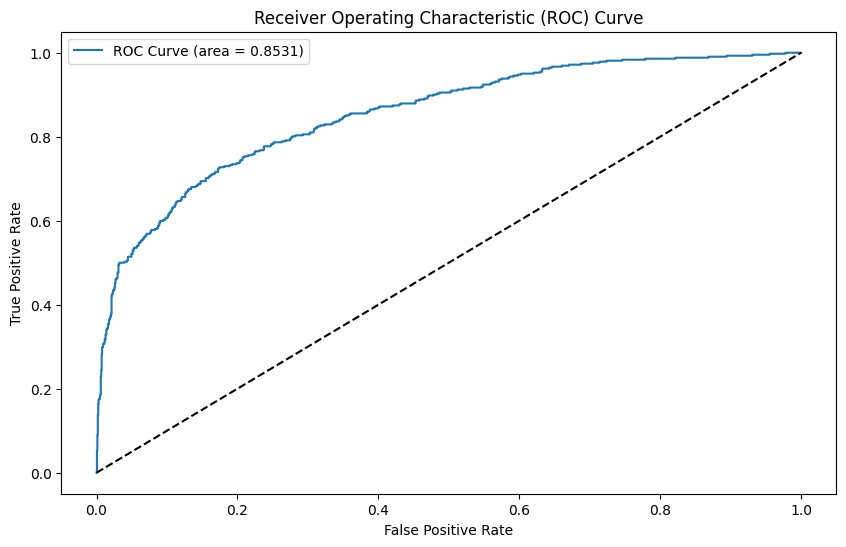

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# F1-score 계산
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[[1555   82]
 [ 161  261]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1637
           1       0.76      0.62      0.68       422

    accuracy                           0.88      2059
   macro avg       0.83      0.78      0.80      2059
weighted avg       0.88      0.88      0.88      2059



c:\python310\lib\site-packages\xgboost\core.py:158: UserWarning: [02:06:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

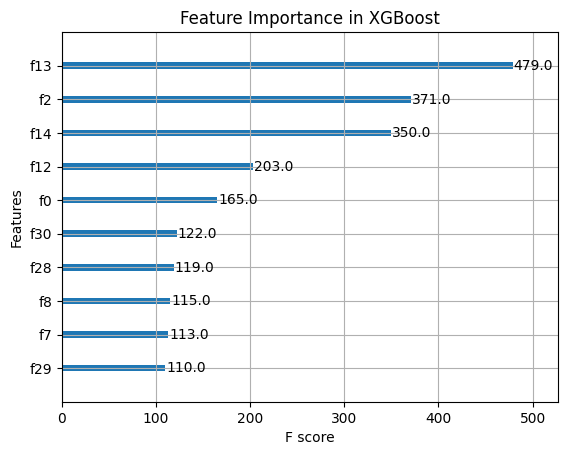

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

# 데이터 전처리: 결측치 처리 및 feature 선택
# df.fillna(0, inplace=True)  # 결측치를 0으로 대체

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 (선택 사항, XGBoost는 스케일링에 민감하지 않지만 필요할 경우 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost 모델 생성 및 훈련
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('Feature Importance in XGBoost')
plt.show()